In [1]:
from pandas import read_csv, DataFrame
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


df: DataFrame = read_csv('housing.csv')
df.info(verbose=True)
df.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

In [2]:
# jex de données 

# - il y a 10 variables: toutes les variables sont de type float64 sauf "ocean_proximity", elle est de type object

# - oui, pour certaines données, il manque le "totla_bedrooms" car il y a 20640 instances de données pour chaque variable, sauf pour "total_bedrooms"

############################

In [3]:
validation, test = train_test_split(df, test_size=0.5)
test, graph_data = train_test_split(df, test_size=10)

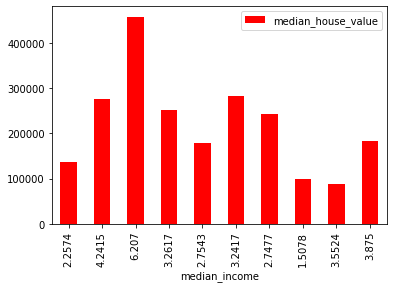

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.922671,-0.116100,0.053581,0.078299,0.104347,0.063390,-0.003067,-0.035239
latitude,-0.922671,1.000000,0.016855,-0.045057,-0.076269,-0.114903,-0.080472,-0.090185,-0.154115
housing_median_age,-0.116100,0.016855,1.000000,-0.368627,-0.330202,-0.300004,-0.311444,-0.121745,0.105613
total_rooms,0.053581,-0.045057,-0.368627,1.000000,0.931913,0.849383,0.920665,0.208962,0.139576
total_bedrooms,0.078299,-0.076269,-0.330202,0.931913,1.000000,0.867707,0.977787,0.004287,0.058320
population,0.104347,-0.114903,-0.300004,0.849383,0.867707,1.000000,0.900396,0.015405,-0.020570
households,0.063390,-0.080472,-0.311444,0.920665,0.977787,0.900396,1.000000,0.026243,0.072729
median_income,-0.003067,-0.090185,-0.121745,0.208962,0.004287,0.015405,0.026243,1.000000,0.686412
median_house_value,-0.035239,-0.154115,0.105613,0.139576,0.058320,-0.020570,0.072729,0.686412,1.000000


In [4]:
graph_data.plot(kind='bar', x='median_income', y='median_house_value', color='red')

plt.show()

validation.corr()

In [5]:
# la variable "median_income" semble être la vairalbe la plue corrélée au prix des maison

In [10]:
# Préparation des données


#variables à expliquer 
median_house_value = test.copy()['median_house_value']

#variables explicatives 
variables_explicatives = test.copy().drop(columns=['median_house_value'])

# supprimer les données manquantes "total_bedrooms"
variables_explicatives = variables_explicatives.drop(columns=['total_bedrooms'])
print(median_house_value)

7002     158200.0
20084     99800.0
10525    183300.0
9230      95300.0
9830     279200.0
           ...   
3105     105300.0
9400     500001.0
10469    251300.0
9285     209800.0
10951    137500.0
Name: median_house_value, Length: 20630, dtype: float64


In [7]:
# normaliser la variable "ocean_proximity"
labelencoder = LabelEncoder()
variables_explicatives['ocean_proximity'] = labelencoder.fit_transform(variables_explicatives['ocean_proximity'])

print(variables_explicatives)


       longitude  latitude  housing_median_age  total_rooms  population  \
7002     -118.04     33.97                34.0       1759.0      1282.0   
20084    -120.27     38.02                13.0       3839.0      1486.0   
10525    -117.70     33.56                 3.0       2443.0      1033.0   
9230     -120.11     36.96                17.0       3344.0      1624.0   
9830     -121.91     36.63                42.0        817.0       391.0   
...          ...       ...                 ...          ...         ...   
3105     -117.68     35.63                18.0       4334.0      1777.0   
9400     -122.56     37.91                52.0       1972.0       755.0   
10469    -117.72     33.53                14.0       1672.0       704.0   
9285     -122.56     38.09                17.0       9614.0      4684.0   
10951    -117.86     33.75                13.0       1632.0      3356.0   

       households  median_income  ocean_proximity  
7002        391.0         3.0491               

In [9]:
# normaliser la variable "total_rooms"
min_total_rooms = variables_explicatives['total_rooms'].min()
max_total_rooms = variables_explicatives['total_rooms'].max()

variables_explicatives['total_rooms'] = variables_explicatives['total_rooms'].apply(lambda x: round((x * 100)/max_total_rooms))
print(min_total_rooms)
print(max_total_rooms)
print(variables_explicatives)

0.00508646998982706
100.0
       longitude  latitude  housing_median_age  total_rooms  population  \
7002     -118.04     33.97                34.0            4      1282.0   
20084    -120.27     38.02                13.0           10      1486.0   
10525    -117.70     33.56                 3.0            6      1033.0   
9230     -120.11     36.96                17.0            9      1624.0   
9830     -121.91     36.63                42.0            2       391.0   
...          ...       ...                 ...          ...         ...   
3105     -117.68     35.63                18.0           11      1777.0   
9400     -122.56     37.91                52.0            5       755.0   
10469    -117.72     33.53                14.0            4       704.0   
9285     -122.56     38.09                17.0           24      4684.0   
10951    -117.86     33.75                13.0            4      3356.0   

       households  median_income  ocean_proximity  
7002        391.0    